<a href="https://colab.research.google.com/github/MikeyClausen/Prediction-of-Product-Sales/blob/main/p1p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlet Store Sales Predictions
##Import Data

In [88]:
#DF, Pandas, Numpy

df_sales = '/content/drive/MyDrive/DOJO/IMPORTS/sales_predictions.xlsx'
import pandas as pd
import numpy as np
df = pd.read_excel(df_sales)

##Loading Data

In [ ]:
#View Columns
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning

## 1. How many rows and columns?



In [ ]:
#Display info for Rows and Columns
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## 2. What are the datatypes of each variable?



In [ ]:
#Data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##3. Are there duplicates? If so, drop any duplicates.

In [ ]:
# Any Duplicates?
df.duplicated().sum()

0

##4. Identify missing values.

In [ ]:
#Missing values list.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

##**Item_Weight Missing Values**
###Justification
####We will use mean to impute the following data. It should closely represnt accurate info here.

In [ ]:
#Now we will replace any blank fields with our mean.
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

##**Outlet_Size Missing Values**
###Justification
####We will use mode here to impute data. This will average over the data and fill info as needed. Based on Outlet_Size



In [ ]:
#Use mode because categorical data.
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)


#6. Confirm that there are no missing values after addressing them.

In [ ]:
#Checking missing values are replaced.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
#Use .value_counts() to find issues.
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Use replace to fix typos and clean up data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
#Check if changes made.
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
#Use df.describe()
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


###For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

#####Histogram to view the distributions of various features in your dataset.
#####Boxplot to view statistical summaries of various features in your dataset.
#####Heatmap of the correlation between features.

In [ ]:
#
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Display data for ease of access.
df.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


<ipython-input-66-9053be2a47d3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Item by Type Count')

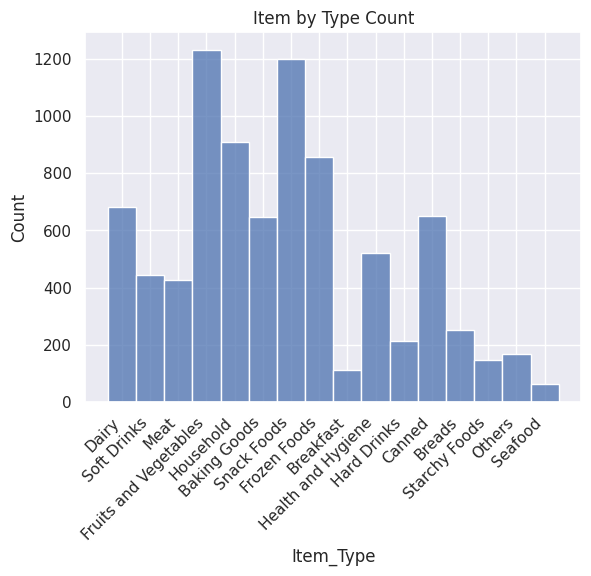

In [ ]:
#Histogram 1.
sns.set(style='darkgrid')
ax=sns.histplot(df['Item_Type'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Item by Type Count')

<ipython-input-67-46b49b3b17be>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Count by Fat Content')

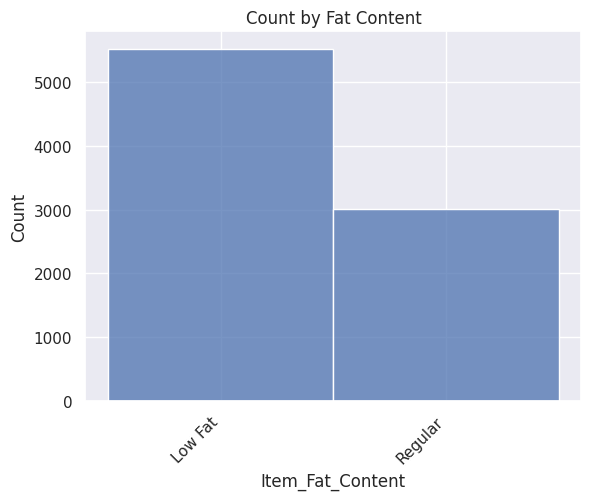

In [ ]:
#Histogram 2.
sns.set(style='darkgrid')
ax=sns.histplot(df['Item_Fat_Content'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Count by Fat Content')

<ipython-input-68-6ca8da9e8e78>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Outlet Type Count')

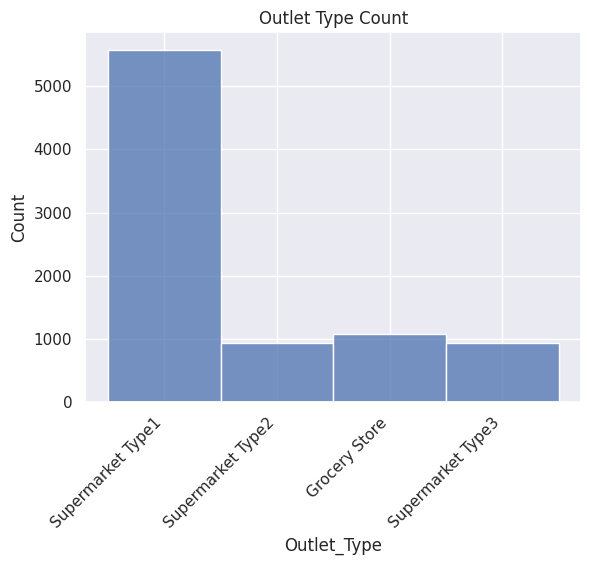

In [ ]:
#Histogram 3.
sns.set(style='darkgrid')
ax=sns.histplot(df['Outlet_Type'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Outlet Type Count')

<ipython-input-69-1be41cedca3b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Item Type by Visibility')

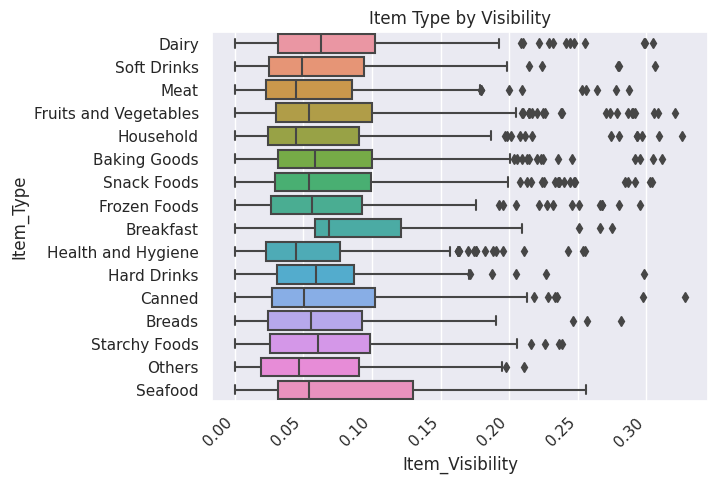

<ipython-input-72-1be41cedca3b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Item Type by Visibility')

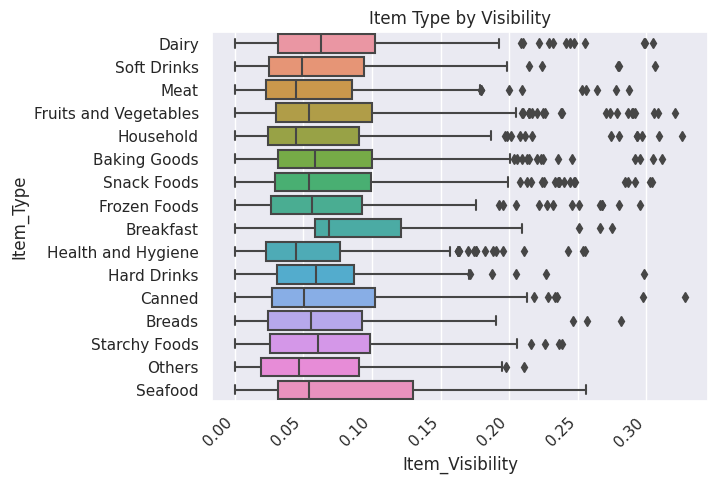

In [ ]:
#Boxplot 1.
sns.set(style='darkgrid')
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_Visibility'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Item Type by Visibility')

<ipython-input-70-106ce8d100ba>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')


[Text(-2000.0, 0, '−2000'),
 Text(0.0, 0, '0'),
 Text(2000.0, 0, '2000'),
 Text(4000.0, 0, '4000'),
 Text(6000.0, 0, '6000'),
 Text(8000.0, 0, '8000'),
 Text(10000.0, 0, '10000'),
 Text(12000.0, 0, '12000'),
 Text(14000.0, 0, '14000')]

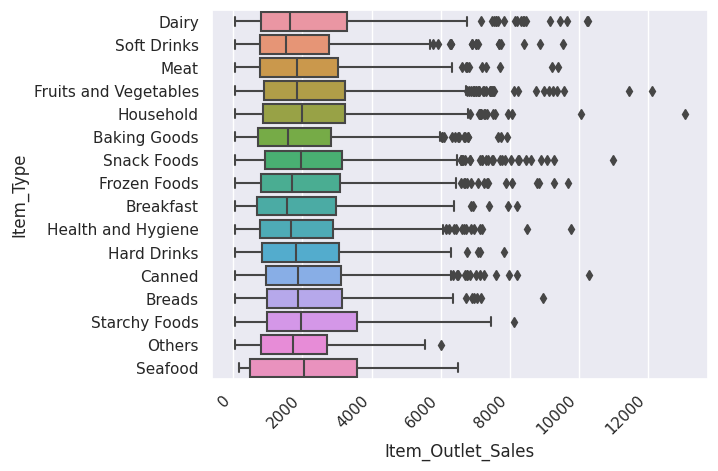

In [ ]:
#Boxplot 2.
sns.set(style='darkgrid')
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_Outlet_Sales'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

<ipython-input-112-9c6af9d1a801>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')


[Text(0.0, 0, '0'),
 Text(50.0, 0, '50'),
 Text(100.0, 0, '100'),
 Text(150.0, 0, '150'),
 Text(200.0, 0, '200'),
 Text(250.0, 0, '250'),
 Text(300.0, 0, '300')]

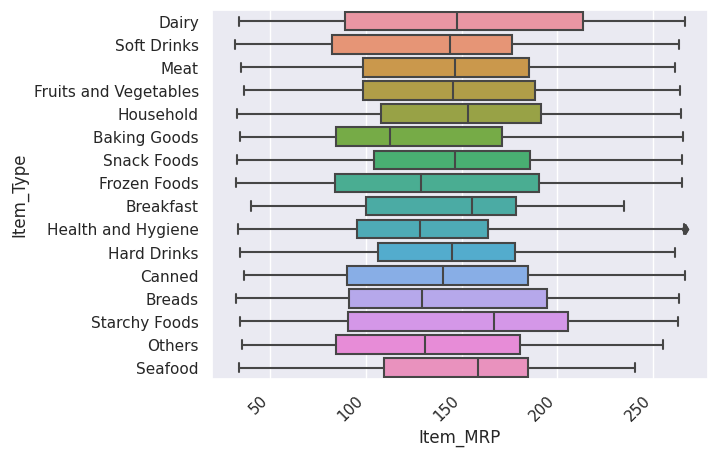

In [112]:
#Boxplot 3.
sns.set(style='darkgrid')
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_MRP'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

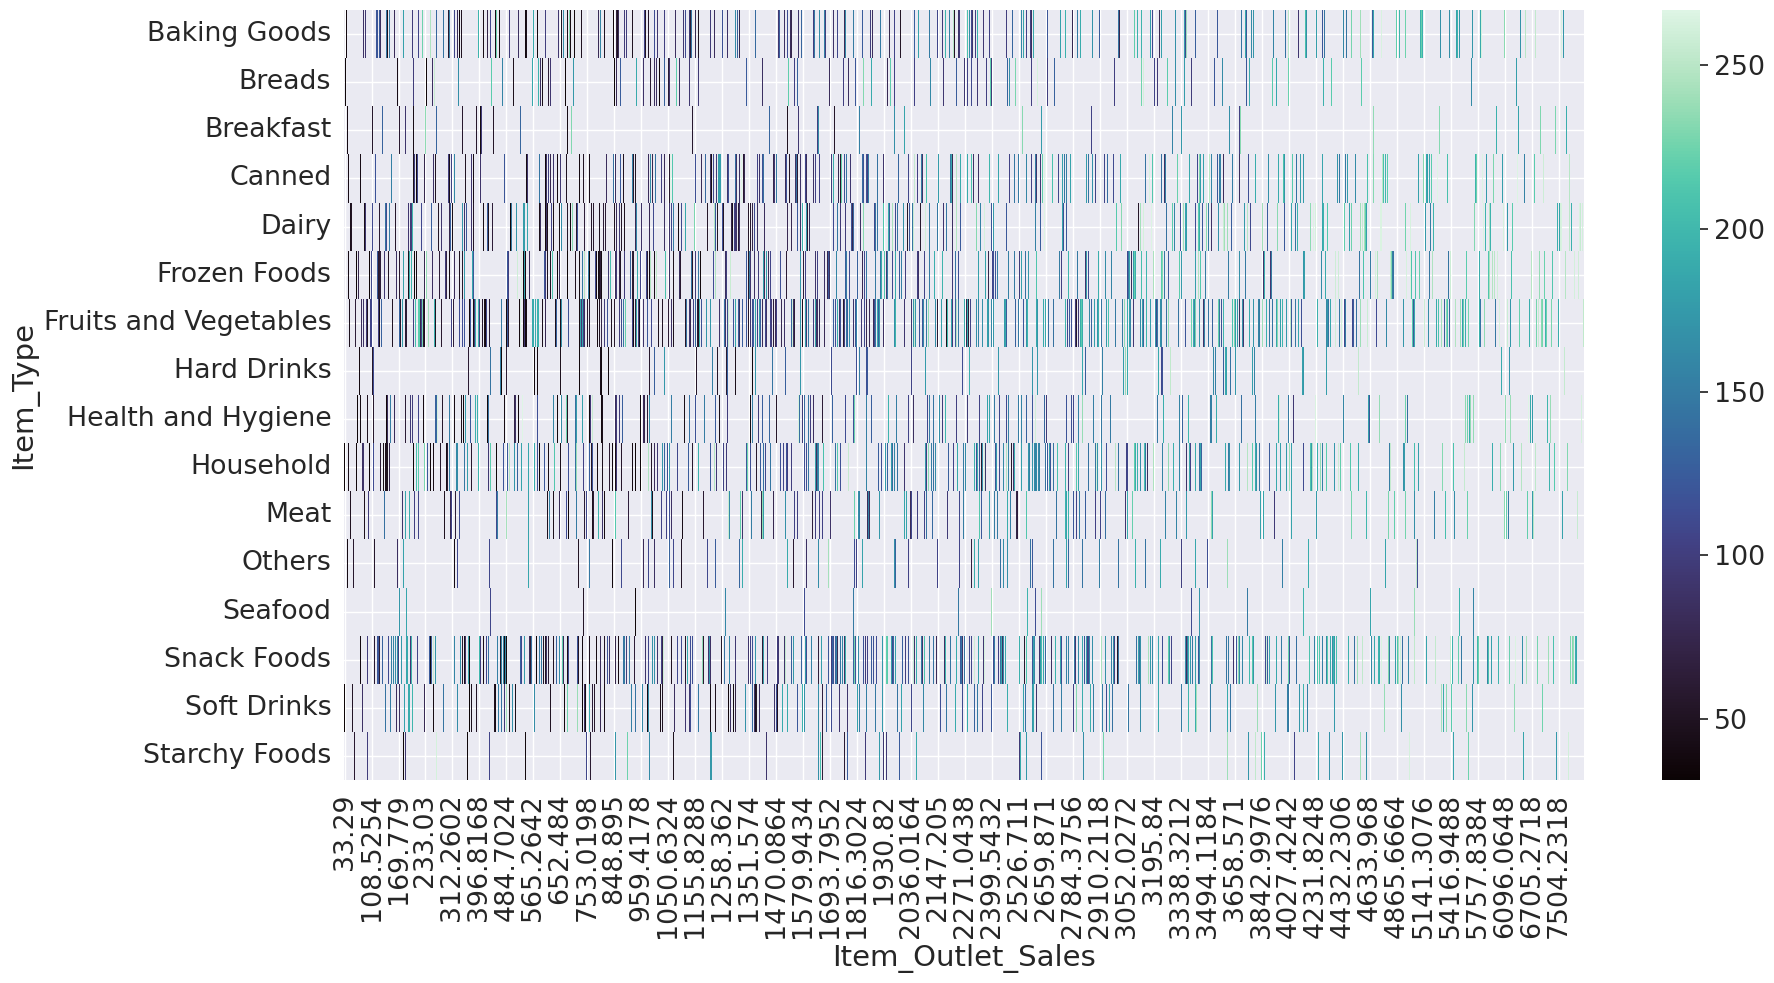

In [148]:
#Heatmap 1.
plt.figure(figsize=(20,10))
df_heatmap = df.pivot_table(index='Item_Type', columns='Item_Outlet_Sales', values='Item_MRP')
sns.heatmap(df_heatmap, cmap='mako')

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Type'>

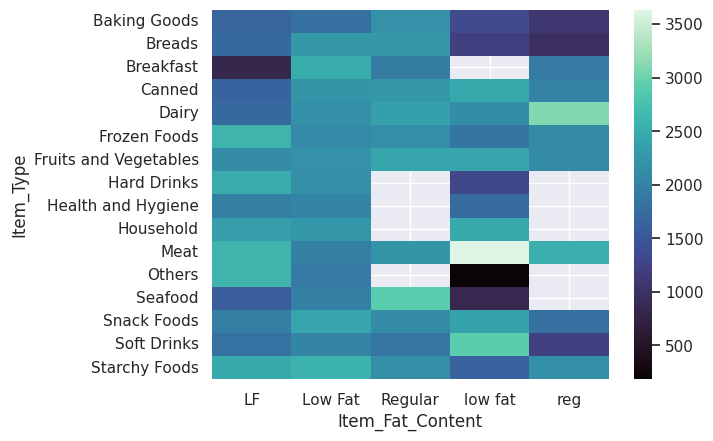

In [95]:
#Heatmap 2.
df_heatmap = df.pivot_table(index='Item_Type', columns='Item_Fat_Content', values='Item_Outlet_Sales')
sns.heatmap(df_heatmap, cmap='mako')


<Axes: xlabel='Outlet_Size', ylabel='Item_Type'>

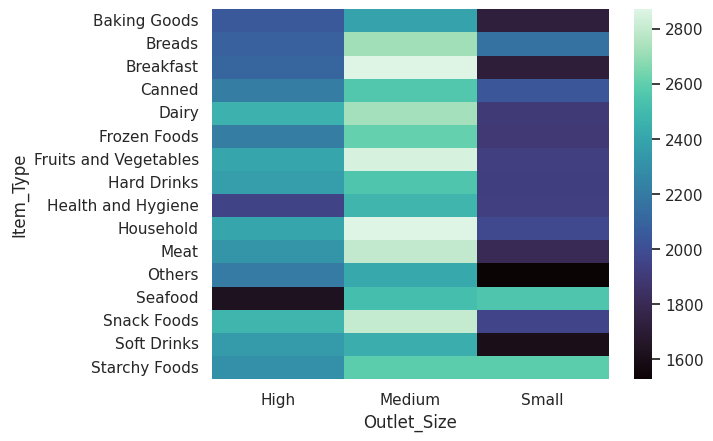

In [96]:
#Heatmap 3.
df_heatmap = df.pivot_table(index='Item_Type', columns='Outlet_Size', values='Item_Outlet_Sales')
sns.heatmap(df_heatmap, cmap='mako')